# Uebung 2

# 1) Hauptkomponentenanalyse

## 1a) Implementierung der Hauptkomponentenanalyse

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'TGT']
boston = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols, index_col=False)
date_downloaded = !date
date_downloaded

['Wed Nov 16 10:23:41 UTC 2016']

In [4]:
boston.dropna()
boston.drop_duplicates()
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
x = boston.mean()
x

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
TGT         22.532806
dtype: float64

In [6]:
centralized = boston.copy()
centralized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
centralized=centralized.sub(centralized.mean(axis=0), axis=1)
centralized.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TGT
0,-3.607204,6.636364,-8.826779,-0.06917,-0.016695,0.290366,-3.374901,0.294957,-8.549407,-112.237154,-3.155534,40.225968,-7.673063,1.467194
1,-3.586214,-11.363636,-4.066779,-0.06917,-0.085695,0.136366,10.325099,1.172057,-7.549407,-166.237154,-0.655534,40.225968,-3.513063,-0.932806
2,-3.586234,-11.363636,-4.066779,-0.06917,-0.085695,0.900366,-7.474901,1.172057,-7.549407,-166.237154,-0.655534,36.155968,-8.623063,12.167194
3,-3.581154,-11.363636,-8.956779,-0.06917,-0.096695,0.713366,-22.774901,2.267157,-6.549407,-186.237154,0.244466,37.955968,-9.713063,10.867194
4,-3.544474,-11.363636,-8.956779,-0.06917,-0.096695,0.862366,-14.374901,2.267157,-6.549407,-186.237154,0.244466,40.225968,-7.323063,13.667194


In [8]:
normalized = centralized / (centralized.max() - centralized.min())
normalized.max() - normalized.min()

CRIM       1.0
ZN         1.0
INDUS      1.0
CHAS       1.0
NOX        1.0
RM         1.0
AGE        1.0
DIS        1.0
RAD        1.0
TAX        1.0
PTRATIO    1.0
B          1.0
LSTAT      1.0
TGT        1.0
dtype: float64

In [19]:
#X = normalized.as_matrix()
X = centralized.as_matrix()
X

array([[ -3.60720356,   6.63636364,  -8.82677866, ...,  40.22596838,
         -7.67306324,   1.46719368],
       [ -3.58621356, -11.36363636,  -4.06677866, ...,  40.22596838,
         -3.51306324,  -0.93280632],
       [ -3.58623356, -11.36363636,  -4.06677866, ...,  36.15596838,
         -8.62306324,  12.16719368],
       ..., 
       [ -3.55276356, -11.36363636,   0.79322134, ...,  40.22596838,
         -7.01306324,   1.36719368],
       [ -3.50393356, -11.36363636,   0.79322134, ...,  36.77596838,
         -6.17306324,  -0.53280632],
       [ -3.56611356, -11.36363636,   0.79322134, ...,  40.22596838,
         -4.77306324, -10.63280632]])

In [20]:
U, D, Vt = np.linalg.svd(X, full_matrices=True)
U.shape, D.shape, Vt.shape

((506, 506), (14,), (14, 14))

Die ersten r Hauptkomponenten sind die ersten r Spalten von V.

In [28]:
principal_components = Vt.transpose()

Die Projektion ai der Daten xi auf die ersten r Hauptkomponenten sind die ersten r Spalte von UD.

In [29]:
d = np.zeros((506, 14))
d[:14, :14] = np.diag(D)
UD = np.dot(U, d)
UD.shape

(506, 14)

In [30]:
d2 = D #/ len(D)-1
eigenvalues = np.square(d2)
eigenvalues

array([  1.56095565e+07,   3.15666121e+06,   4.15344323e+05,
         1.34984734e+05,   3.89067774e+04,   2.35751382e+04,
         8.61676592e+03,   6.84701454e+03,   4.49935571e+03,
         1.37421159e+03,   5.56522188e+02,   1.10056922e+02,
         2.98482483e+01,   1.47727458e+00])

## 1b) Test des Moduls Hauptkomponentenanalyse

Stellen Sie Ihre Ergebnisse in einer Tabelle mit den Eigenwerten der Kovarianzmatrix
(Achtung: die Diagonalelemente von D müssen dafür quadriert und durch n − 1 geteilt
werden. Warum?), dem Anteil der zugehörigen Hauptkomponente a n an der Gesamtvarianz
(“erklärte Varianz”) und der kumulativen erklärten Varianz dar, d.h. welchen Varianzanteil
die ersten n Komponenten zusammen erklären.

In [27]:
number_of_elements = eigenvalues.size
print("Number of elements: ", number_of_elements)

func = np.vectorize(lambda x: x * (100 / number_of_elements))
proportion = func(eigenvalues)

cumulative = (proportion * 100.0 / proportion.sum()).cumsum()

result_table = pd.concat([
        pd.DataFrame(eigenvalues, columns=["Eigenwerte"]),
        pd.DataFrame(proportion, columns=["Anteil der zugehörigen Hauptkomponente"]),
        pd.DataFrame(cumulative, columns=["Kumulativ erklärte Varianz"])
    ], axis=1)
result_table

Number of elements:  14


,Eigenwerte,Anteil der zugehörigen Hauptkomponente,Kumulativ erklärte Varianz
0,1.560956e+07,1.114968e+08,80.457219
1,3.156661e+06,2.254758e+07,96.727776
2,4.153443e+05,2.966745e+06,98.868609
3,1.349847e+05,9.641767e+05,99.564368
4,3.890678e+04,2.779056e+05,99.764908
5,2.357514e+04,1.683938e+05,99.886422
6,8.616766e+03,6.154833e+04,99.930836
7,6.847015e+03,4.890725e+04,99.966128
8,4.499356e+03,3.213826e+04,99.989320
9,1.374212e+03,9.815797e+03,99.996403


Wieviele Dimensionen können Sie weglassen,
wenn Sie 10%, 5% und 1% Fehler bei der Dimensionsreduktion zulassen?

10% => Die ersten beiden Hauptkomponenten
5% => Die ersten beiden Hauptkomponenten
1% => Die ersten vier Hauptkomponenten

## 1c) Berechnen Sie den Korrelationskoeffizienten der Projektionen auf die ersten drei Hauptkomponenten mit den Ursprünglichen Variablen

In [45]:
a = UD[0:3]
corrcoef = []
for i in range(0, 3):
    component = []
    for data in boston:
        component.append(np.corrcoef(boston[data], UD[:,i])[0][1])
    corrcoef.append(component)

pd.DataFrame(corrcoef, columns=boston.columns).T

,0,1,2
CRIM,0.598763,-0.061312,-0.040073
ZN,-0.328761,-0.003793,0.777348
INDUS,0.725985,0.056982,-0.369504
CHAS,-0.038672,0.032111,-0.105570
NOX,0.682237,-0.001268,-0.445792
RM,-0.292947,-0.040611,0.205130
AGE,0.522358,0.015987,-0.766612
DIS,-0.547655,-0.013345,0.608827
RAD,0.908346,0.078427,0.010846
TAX,0.990394,0.137295,0.016203


Interpretation der Ergebnisse:

## 1d) Scatterplot der ersten beiden der neuen Variablen

In [68]:
median_TGT = np.median(boston['TGT'])

smaller_median_TGT = boston['TGT'] < median_TGT
#greater_median_TGT = pd.DataFrame(boston['TGT'] >= median_TGT)

plot = pd.DataFrame(UD)


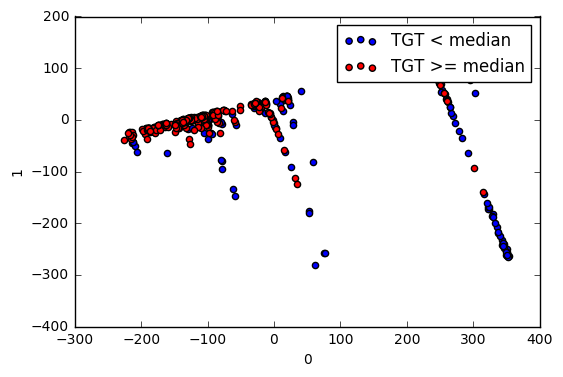

In [71]:
%matplotlib inline
first_plot = plot[smaller_median_TGT].plot(kind="scatter", x=0, y=1, color="Blue", label="TGT < median");
plot[~smaller_median_TGT].plot(kind="scatter", x=0, y=1, color="Red", label="TGT >= median", ax=first_plot);

Eignen sich die beiden neuen Variablen zur Vorhersage des Hauspreises?

In [72]:
%load_ext version_information
%version_information numpy, pandas, matplotlib

Software versions
Python 3.5.2 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.4.0 47 generic x86_64 with debian 8.5
numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
Wed Nov 16 11:31:23 2016 UTC